In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
numara = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [4]:
data = train.append(test)

In [5]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3568,7766_01,Earth,False,G/1256/S,TRAPPIST-1e,51.0,False,704.0,0.0,0.0,2.0,0.0,Jodyn Pearsalason,NaN
555,0583_02,Mars,True,F/109/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Beeres Erle,True
8221,8786_01,Europa,True,B/284/P,55 Cancri e,59.0,False,0.0,0.0,0.0,0.0,0.0,Sadir Fringearty,True
1787,3809_02,Earth,False,G/624/P,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0,Bethew Wilderssen,NaN
3905,4176_07,Mars,False,F/859/P,55 Cancri e,24.0,False,612.0,326.0,46.0,87.0,0.0,Wille Fla,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [8]:
data.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [9]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
data.describe(include = object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,12970,12682,12660,12671,12696,12674,12676,8693
unique,12970,3,2,9825,3,2,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True
freq,1,6865,8079,8,8871,12401,2,4378


###  home planet column

In [11]:
data.HomePlanet.value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

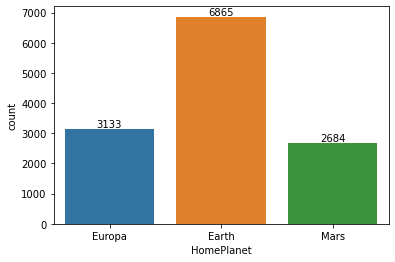

In [12]:
ax = sbn.countplot(x = data['HomePlanet'])
ax.bar_label(ax.containers[0]);

In [13]:
data.HomePlanet.isna().sum()

288

In [14]:
data.HomePlanet = data.HomePlanet.fillna(train.HomePlanet.mode()[0])

In [15]:
data.HomePlanet.isnull().sum()

0

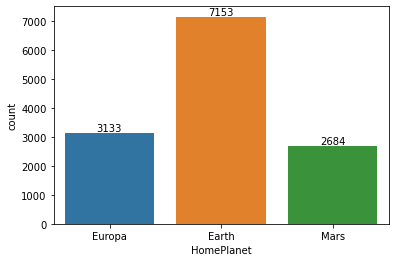

In [16]:
ax = sbn.countplot(x = data['HomePlanet'])
ax.bar_label(ax.containers[0]);

In [17]:
data.HomePlanet.value_counts(ascending = False)

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

### CryoSleep column

In [18]:
data.CryoSleep.value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [19]:
data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])

In [20]:
d = {False : 0, True : 1}
#data['CryoSleep'] = data['CryoSleep'].map(d)
data['CryoSleep'] = data['CryoSleep'].replace(d)
# data['CryoSleep'] = data['CryoSleep'].replace({False: 0, True: 1})

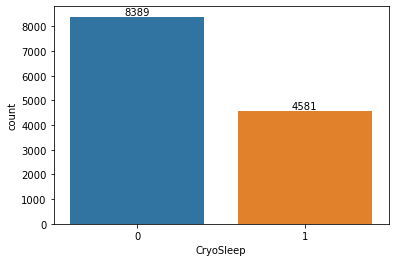

In [21]:
bx = sbn.countplot(x = data.CryoSleep)
bx.bar_label(bx.containers[0]);

### Cabin column

In [22]:
data.Cabin.nunique()   # çok fazla farklı cabin olduğu için bu sütunu atabiliriz.

9825

In [23]:
data = data.drop('Cabin', axis = 1)

In [24]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')

### Destination column

In [25]:
data.Destination.value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [26]:
data.Destination.isnull().sum()

274

In [27]:
data.Destination = data.Destination.fillna(data.Destination.mode()[0])

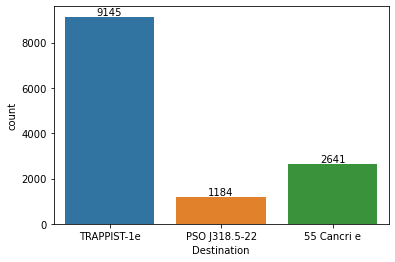

In [28]:
cx = sbn.countplot(x = data.Destination)
cx.bar_label(cx.containers[0]);

### Age Column

In [29]:
print(data.Age.mean(), data.Age.max(), data.Age.min(), data.Age.mode())

28.771968503937007 79.0 0.0 0    18.0
Name: Age, dtype: float64


In [30]:
data.Age = data.Age.fillna(data.Age.mean())

In [31]:
data.Age.isnull().sum()

0

In [32]:
data.Age

0       39.000000
1       24.000000
2       58.000000
3       33.000000
4       16.000000
          ...    
4272    34.000000
4273    42.000000
4274    28.771969
4275    28.771969
4276    43.000000
Name: Age, Length: 12970, dtype: float64

### VIP Column

In [33]:
data.VIP.isnull().sum()

296

In [34]:
data.VIP.value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [35]:
data.VIP = data.VIP.fillna(data.VIP.mode()[0])

In [36]:
data.VIP = data.VIP.map(d)

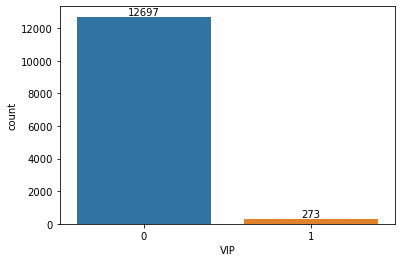

In [37]:
dx = sbn.countplot(x = data.VIP)
dx.bar_label(dx.containers[0]);

### Room Service Column

In [38]:
data.RoomService.isna().sum()

263

In [39]:
print(data.RoomService.mean(), data.RoomService.max(), data.RoomService.min(), data.RoomService.mode())

222.89785157787045 14327.0 0.0 0    0.0
Name: RoomService, dtype: float64


In [40]:
data.RoomService.value_counts()

0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64

In [41]:
data.RoomService = data.RoomService.fillna(data.RoomService.mode()[0])

In [42]:
data.RoomService.nunique()

1578

In [43]:
data.RoomService.isna().sum()

0

### FoodCourt Column

In [44]:
data.FoodCourt.value_counts()

0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64

In [45]:
data.FoodCourt = data.FoodCourt.fillna(data.FoodCourt.mode()[0])

In [46]:
data.FoodCourt.isna().sum()

0

### ShoppingMall, Spa, VRDeck columns

In [47]:
data.ShoppingMall.value_counts()

0.0       8331
1.0        225
2.0        112
3.0         94
4.0         69
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: ShoppingMall, Length: 1367, dtype: int64

In [48]:
data.Spa.value_counts()

0.0       7935
1.0        218
2.0        148
3.0         82
4.0         73
          ... 
971.0        1
2290.0       1
1450.0       1
4517.0       1
1812.0       1
Name: Spa, Length: 1679, dtype: int64

In [49]:
data.VRDeck.value_counts()

0.0       8252
1.0        211
2.0        108
3.0         89
5.0         68
          ... 
395.0        1
3186.0       1
2519.0       1
1652.0       1
494.0        1
Name: VRDeck, Length: 1642, dtype: int64

In [50]:
data.ShoppingMall = data.ShoppingMall.fillna(data.ShoppingMall.mode()[0])
data.Spa = data.Spa.fillna(data.Spa.mode()[0])
data.VRDeck = data.VRDeck.fillna(data.VRDeck.mode()[0])

In [51]:
data.ShoppingMall.isnull().sum(), data.Spa.isnull().sum(), data.VRDeck.isnull().sum()

(0, 0, 0)

In [52]:
### Name Column

In [53]:
data = data.drop('Name', axis = 1)

In [54]:
data.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
dtype: int64

In [55]:
data.Transported = data.Transported.map(d)
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,TRAPPIST-1e,39.000000,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.000000,0,109.0,9.0,25.0,549.0,44.0,1.0
2,0003_01,Europa,0,TRAPPIST-1e,58.000000,1,43.0,3576.0,0.0,6715.0,49.0,0.0
3,0003_02,Europa,0,TRAPPIST-1e,33.000000,0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0004_01,Earth,0,TRAPPIST-1e,16.000000,0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0,NaN
4273,9269_01,Earth,0,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0,NaN
4274,9271_01,Mars,1,55 Cancri e,28.771969,0,0.0,0.0,0.0,0.0,0.0,NaN
4275,9273_01,Europa,0,TRAPPIST-1e,28.771969,0,0.0,2680.0,0.0,0.0,523.0,NaN


In [56]:
data.drop('PassengerId', axis = 1, inplace = True)

In [57]:
df = pd.get_dummies(data, drop_first = True)

In [58]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,0,24.000000,0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,0,1
2,0,58.000000,1,43.0,3576.0,0.0,6715.0,49.0,0.0,1,0,0,1
3,0,33.000000,0,0.0,1283.0,371.0,3329.0,193.0,0.0,1,0,0,1
4,0,16.000000,0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,1
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,NaN,0,0,0,1
4274,1,28.771969,0,0.0,0.0,0.0,0.0,0.0,NaN,0,1,0,0
4275,0,28.771969,0,0.0,2680.0,0.0,0.0,523.0,NaN,1,0,0,1


In [59]:
df.to_csv('spaceship_son_hali.csv', index = False)

## Test and Train

In [60]:
train = df[:8693]
test = df[8693:]

In [61]:
train.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [62]:
x = train.drop('Transported', axis = 1)
y = train['Transported']

## Models

In [63]:
def classification(x, y):
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()
    model3 = RandomForestClassifier()
    model4 = GradientBoostingClassifier()
    model5 = BernoulliNB()
    model6 = GaussianNB()
    model7 = MultinomialNB()
    model8 = SVC()
    model9 = XGBClassifier()
    model10 = AdaBoostClassifier()
    model11  = ExtraTreesClassifier()
    model12 = ExtraTreeClassifier()
    model13 = BaggingClassifier()
    #model14 = StackingClassifier(estimators, final_estimator=LogisticRegression())
    
    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13]
    model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoost', 'Bernoulli', 'Gaussian',
                  'Multinomial', 'SupportVector', 'XGBoost', 'AdaBoost', 'ExtraTrees', 'ExtraTree', 'Bagging']
    x_train, x_test, y_train, y_true = train_test_split(x, y, train_size = 0.8, random_state = 42)
    #x_train = StandardScaler().fit_transform(x_train)
    #x_test = StandardScaler().fit_transform(x_test)
    #x_train = MinMaxScaler().fit_transform(x_train)
    #x_test = MinMaxScaler().fit_transform(x_test)
    
    acc = []
    skor_df = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
    
    skor_df['Accuracy'] = acc
    
    return skor_df.sort_values('Accuracy', ascending = False)
    

In [64]:
classification(x, y)

,Accuracy
GradientBoost,78.378378
XGBoost,78.263370
RandomForest,77.918344
LogisticRegression,77.573318
AdaBoost,77.515814
SupportVector,77.400805
ExtraTrees,77.400805
Bagging,76.825762
Multinomial,76.250719
Bernoulli,73.720529


In [65]:
def classification2(x, y):
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()
    model3 = RandomForestClassifier()
    model4 = GradientBoostingClassifier()
    model5 = BernoulliNB()
    model6 = GaussianNB()
    model7 = AdaBoostClassifier()
    model8 = SVC(kernel = 'rbf')
    model9 = XGBClassifier()
    model10 = ExtraTreesClassifier()
    
    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
    model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoost', 'Bernoulli', 'Gaussian',
                   'AdaBoost', 'SupportVector', 'XGBoost', 'ExtraTree']
    x_train, x_test, y_train, y_true = train_test_split(x, y, train_size = 0.8, random_state = 42)
    #x_train = StandardScaler().fit_transform(x_train)
    #x_test = StandardScaler().fit_transform(x_test)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)
    
    acc = []
    skor_df = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
    
    skor_df['Accuracy'] = acc
    
    return skor_df.sort_values('Accuracy', ascending = False)
    

In [66]:
classification2(x, y)

,Accuracy
XGBoost,78.033353
GradientBoost,77.630822
RandomForest,77.458309
AdaBoost,77.400805
ExtraTree,77.113283
SupportVector,76.423232
LogisticRegression,76.365727
Bernoulli,73.720529
DecisionTree,73.202990
Gaussian,73.030477


In [74]:
def ml_save(model, csv_name):
    model.fit(x, y)
    tahmin = model.predict(test.drop('Transported', axis = 1))
    sonuc = pd.DataFrame()
    sonuc['PassengerId'] = numara['PassengerId']
    sonuc['Transported'] = tahmin
    sonuc['Transported'] = sonuc['Transported'].astype('int64').map({0 : False, 1 : True})
    sonuc.to_csv(csv_name, index = False)

In [75]:
ml_save(XGBClassifier(), "XGB_tahmin.csv")

In [76]:
ml_save(GradientBoostingClassifier(), "GB_tahmin.csv")

In [77]:
ml_save(RandomForestClassifier(), "RF_tahmin.csv")

In [78]:
ml_save(AdaBoostClassifier(), "AB_tahmin.csv")

## Deep Learning model

In [82]:
 x_train, x_test, y_train, y_true = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [99]:
model = Sequential()

model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 200, activation = 'relu'))
model.add(Dense(units = 200, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [100]:
early = EarlyStopping(monitor = 'accuracy', patience = 10, mode = 'max')

In [102]:
history = model.fit(x_train, y_train, epochs = 100, verbose = 1, batch_size = 32, validation_data = (x_test, y_true), callbacks = [early])

Epoch 1/100
218/218 [==============================] - 2s 2ms/step - loss: 1.1663 - accuracy: 0.7540 - val_loss: 0.6446 - val_accuracy: 0.7573
Epoch 2/100
218/218 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7869 - val_loss: 0.4980 - val_accuracy: 0.7717
Epoch 3/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7886 - val_loss: 0.4744 - val_accuracy: 0.7769
Epoch 4/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7931 - val_loss: 0.4815 - val_accuracy: 0.7717
Epoch 5/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7863 - val_loss: 0.4781 - val_accuracy: 0.7740
Epoch 6/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7951 - val_loss: 0.4598 - val_accuracy: 0.7803
Epoch 7/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7938 - val_loss: 0.4469 - val_accuracy: 0.7809

In [103]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               1300      
                                                                 
 dense_49 (Dense)            (None, 200)               20200     
                                                                 
 dense_50 (Dense)            (None, 200)               40200     
                                                                 
 dense_51 (Dense)            (None, 100)               20100     
                                                                 
 dense_52 (Dense)            (None, 100)               10100     
                                                                 
 dense_53 (Dense)            (None, 100)               10100     
                                                                 
 dense_54 (Dense)            (None, 50)               

In [104]:
model.evaluate(x_test, y_true)

55/55 [==============================] - 0s 850us/step - loss: 0.4372 - accuracy: 0.7809


[0.4371872544288635, 0.7809085845947266]

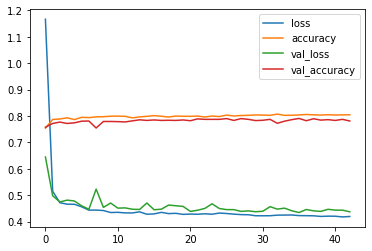

In [107]:
score = pd.DataFrame(history.history)
score.plot();

In [108]:
ml_save(model, "DL_tahmin.csv")

134/134 [==============================] - 0s 742us/step


<img src="tahminler.png" alt="tahminler">

## Yaptıklarımdan en iyi sonucu veren xgboost oldu 0.79